# Fáza 1

**Michaela Gubovská a Jakub Hajdu**

V tejto fáze sa jednotlivo pozrieme na dáta z dvoch súborov - profiles.csv a labor.csv. Pre potreby našej analýzy sme dáta z týchto súborov nespájali do jednej veľkej tabuľky, avšak v ďalších fázach tak s najväčšou pravdepodobnosťou spravíme a spojíme tabuľky na základe stĺpca "ssn", ktorý sa v oboch nachádza.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms

## Základný opis dát a ich charakteristika - dáta zo súboru profiles.csv

Najskôr si načítame dáta z "profiles.csv" do data frame.

In [16]:
filename_p = "data/profiles.csv"
dfp = pd.read_csv(filename_p, sep='\t')
## separátorom dát je znak tabulátora

Počet záznamov:

In [3]:
len(dfp)

3082

Počet atribútov:

In [4]:
len(dfp.columns.values)

10

Jednotlivé atribúty a ich typy:

In [5]:
dfp.dtypes

Unnamed: 0      int64
job            object
address        object
blood_group    object
ssn            object
birthdate      object
residence      object
race           object
name           object
sex            object
dtype: object

Základné štatistiky stĺpcov "blood_group", "race" a "sex":

In [6]:
dfp[['blood_group', 'race', 'sex']].describe()

blood_group   race   sex
count         3082   3082  3082
unique           8      8     2
top             O+  White     F
freq           412   1569  1563

<AxesSubplot:xlabel='blood_group', ylabel='Count'>

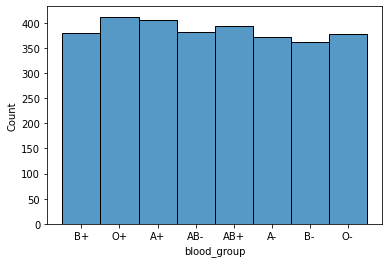

In [7]:
sns.histplot(data=dfp['blood_group'])

<AxesSubplot:xlabel='race', ylabel='Count'>

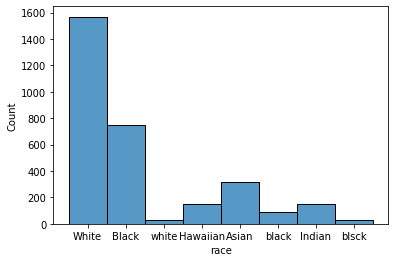

In [8]:
sns.histplot(data=dfp['race'])

<AxesSubplot:xlabel='sex', ylabel='Count'>

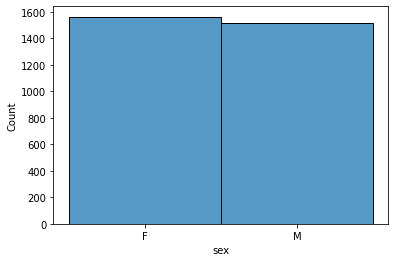

In [9]:
sns.histplot(data=dfp['sex'])

Overíme, či sa v dátach nevyskytujú chýbajúce hodnoty:

In [10]:
dfp.isnull().sum()

Unnamed: 0     0
job            0
address        0
blood_group    0
ssn            0
birthdate      0
residence      0
race           0
name           0
sex            0
dtype: int64

Vypíšeme si začiatok dát. Už z výpisu atribútov bolo vidieť zvláštny stĺpec "Unnamed: 0".

In [11]:
dfp.head()

Unnamed: 0                           job  \
0           0                Quarry manager   
1           1        Financial risk analyst   
2           2      Waste management officer   
3           3     Publishing rights manager   
4           4  Medical sales representative   

                                             address blood_group          ssn  \
0         6269 Kelsey Cove\r\nJessicahaven, KY 76299          B+  818-49-6074   
1  72241 Luna Divide Suite 877\r\nMelindachester,...          B+  617-52-9894   
2        6554 Nicole Lodge\r\nNorth Tanner, PA 59584          B+  690-88-6942   
3  847 Taylor Court Apt. 547\r\nGutierrezfort, SD...          O+  767-13-0171   
4  83815 Richard Causeway Suite 275\r\nLemouth, W...          B+  412-57-1910   

              birthdate                                          residence  \
0            1925-12-31  30070 Anderson Branch Suite 371\r\nHoffmanberg...   
1  03/21/1912, 00:00:00  61551 Williams Shoal Apt. 506\r\nLunaborough, ...   
2            1960-11-19  77305 Palmer Valleys Suite 424\r\nJennifertown...   
3            1978/11/14       62021 Schwartz Roads\r\nJaimeville, SD 64413   
4  03/14/1995, 00:00:00                 Unit 4872 Box 1158\r\nDPO AA 51410   

    race                  name sex  
0  White      Kimberly Frazier   F  
1  Black  Timothy Gutierrez MD   M  
2  Black        Elaine Elliott   F  
3  Black      Richard Anderson   M  
4  white         Jennifer Bass   F

## Identifikácia problémov dát zo súboru profiles.csv s navrhnutým riešením

Ako prvý problém vidíme nepotrebný index stĺpec s názvom "Unnamed: 0", ktorý môžme odstrániť.

In [12]:
dfp.drop('Unnamed: 0', axis=1, inplace=True)
dfp.head()

job  \
0                Quarry manager   
1        Financial risk analyst   
2      Waste management officer   
3     Publishing rights manager   
4  Medical sales representative   

                                             address blood_group          ssn  \
0         6269 Kelsey Cove\r\nJessicahaven, KY 76299          B+  818-49-6074   
1  72241 Luna Divide Suite 877\r\nMelindachester,...          B+  617-52-9894   
2        6554 Nicole Lodge\r\nNorth Tanner, PA 59584          B+  690-88-6942   
3  847 Taylor Court Apt. 547\r\nGutierrezfort, SD...          O+  767-13-0171   
4  83815 Richard Causeway Suite 275\r\nLemouth, W...          B+  412-57-1910   

              birthdate                                          residence  \
0            1925-12-31  30070 Anderson Branch Suite 371\r\nHoffmanberg...   
1  03/21/1912, 00:00:00  61551 Williams Shoal Apt. 506\r\nLunaborough, ...   
2            1960-11-19  77305 Palmer Valleys Suite 424\r\nJennifertown...   
3            1978/11/14       62021 Schwartz Roads\r\nJaimeville, SD 64413   
4  03/14/1995, 00:00:00                 Unit 4872 Box 1158\r\nDPO AA 51410   

    race                  name sex  
0  White      Kimberly Frazier   F  
1  Black  Timothy Gutierrez MD   M  
2  Black        Elaine Elliott   F  
3  Black      Richard Anderson   M  
4  white         Jennifer Bass   F

Ďalší problém dát je nejednotný formát hodnôt v stĺpci "race":

In [13]:
dfp.race.unique()

array(['White', 'Black', 'white', 'Hawaiian', 'Asian', 'black', 'Indian',
       'blsck'], dtype=object)

Tieto hodnoty zjednotíme, zachováme však rasu "Hawaiian" nakoľko sme sa dočítali o skutočnosti, že sa Havajčania považujú za samostatnú rasu.
Po úprave sú hodnoty v konzistentnom formáte.

In [14]:
dfp['race'] = dfp['race'].str.replace('white','White')
dfp['race'] = dfp['race'].str.replace('black','Black')
dfp['race'] = dfp['race'].str.replace('blsck','Black')
dfp.race.unique()

array(['White', 'Black', 'Hawaiian', 'Asian', 'Indian'], dtype=object)

Ako ďalší problém si môžeme všimnúť rôzne formáty dátumov v stĺpci "birthdate". Tieto dátumy preto upravíme na jednotný formát yy-mm-dd.

In [17]:
dfp['birthdate'] = (pd.to_datetime(dfp.birthdate)).dt.year

dfp.birthdate.describe()

count    3082.000000
mean     1962.906230
std        33.502924
min      1905.000000
25%      1934.000000
50%      1963.000000
75%      1992.000000
max      2021.000000
Name: birthdate, dtype: float64

Posledný nami identifikovaný problém sú nezmyselné dáta o osobách mladších ako 15 rokov pričom majú vyplnené zamestnanie.

In [16]:
sum_under_14 = dfp[dfp['birthdate'].dt.year > 2007]
sum_under_14

job  \
32                      Therapist, sports   
37                             Astronomer   
64    Social research officer, government   
65              Occupational psychologist   
88      Planning and development surveyor   
...                                   ...   
3055          Engineer, building services   
3058                  Designer, jewellery   
3066            Radio broadcast assistant   
3067                    Designer, graphic   
3072   Public relations account executive   

                                                address blood_group  \
32    05324 Jordan Grove Apt. 238\r\nNew Alexandria,...          O-   
37       8082 Davis Prairie\r\nWest Scottfort, IL 36181          A-   
64      4399 Pamela Spurs\r\nWest Johnchester, SD 78725         AB-   
65         95106 Janice Fall\r\nDavidsonburgh, HI 64306         AB+   
88    67379 William Ways\r\nLake Victoriaville, MD 2...          O+   
...                                                 ...         ...   
3055    543 Debra Loop\r\nWest Kristenborough, MT 84034          B+   
3058  247 Rivera Extension\r\nPort Andreafurt, TN 79770          A+   
3066          603 Miller Coves\r\nTabithatown, OH 03642         AB+   
3067       071 Smith Extensions\r\nWest Emily, NY 01082          O-   
3072       076 Jennifer Vista\r\nNew Samantha, LA 09776          O-   

              ssn  birthdate  \
32    220-42-8328 2018-03-19   
37    194-87-4332 2010-06-07   
64    605-22-5826 2013-10-29   
65    262-43-2542 2011-09-23   
88    650-34-4074 2019-07-17   
...           ...        ...   
3055  473-75-3051 2013-11-10   
3058  123-83-9055 2016-09-27   
3066  553-68-4985 2012-07-07   
3067  095-31-1095 2014-02-16   
3072  280-01-6370 2020-10-10   

                                              residence      race  \
32           402 Alec Estates\r\nMarshchester, MO 55551  Hawaiian   
37     9928 Russell Mission\r\nPort Chadville, AK 10999     Black   
64                 3429 Fox Forges\r\nSuebury, TX 65082     White   
65    89482 Jessica Tunnel Apt. 702\r\nNew Marcus, M...     White   
88             4517 Leon Groves\r\nAndrewfurt, RI 68424    Indian   
...                                                 ...       ...   
3055  287 Jennifer Corner Apt. 632\r\nDarrellbury, C...  Hawaiian   
3058      9887 Alexander Union\r\nEast Calvin, TX 84450     White   
3066  54071 Jasmine Springs Suite 425\r\nHugheston, ...     Black   
3067  08293 Vega Unions Suite 021\r\nMirandaside, NC...     Black   
3072           536 James Meadow\r\nWest Debra, AK 59069     Black   

                    name sex  
32       Vanessa Serrano   F  
37             Beth Hale   F  
64           Norma Evans   F  
65          Amy Bradshaw   F  
88             Ryan Ross   M  
...                  ...  ..  
3055     Kimberly Knight   F  
3058   Francisco Johnson   M  
3066  Alexandria Kennedy   F  
3067       Crystal Moran   F  
3072        Robert Giles   M  

[357 rows x 9 columns]

Počet týchto záznamov je:

In [17]:
len(sum_under_14)

357

In [18]:
len(sum_under_14)/len(dfp)*100

11.583387410772227

Zo všetkých povolaní sú unikátne tieto:

In [19]:
dfp.job.unique()

array(['Quarry manager', 'Financial risk analyst',
       'Waste management officer', 'Publishing rights manager',
       'Medical sales representative', 'Engineer, water', 'Lobbyist',
       'Theatre stage manager', 'Building control surveyor',
       'Special educational needs teacher',
       'Environmental health practitioner',
       'Development worker, international aid', 'Sports administrator',
       'Operations geologist', 'Arts administrator', 'Ecologist',
       'Human resources officer', 'Environmental manager',
       'Doctor, hospital', 'Water engineer',
       'Exhibitions officer, museum/gallery', 'Haematologist',
       'Psychologist, prison and probation services', 'Music tutor',
       'Horticultural therapist', 'Health and safety inspector',
       'Conference centre manager', 'Psychiatrist', 'Ophthalmologist',
       'Administrator, local government', 'Pharmacologist',
       'Therapist, sports', 'Games developer',
       'Teacher, secondary school', 'Civil Servic

Skontrolovali sme teda, či sa v stĺpci "job" nachádzajú iba legitímne pracovné pozície. Zistili sme, že áno a preto môžeme prehlásiť, že dáta o ľuďoch mladších ako 14 rokov sú nezmyselné, keďže v USA človek v tomto veku nemôže byť zamestnaný.
Týchto nezmyselných dát sa v tabuľke nachádza 357, čo tvorí zaokrúhlene až 11.6% všetkých záznamov. 
Ako riešenie tohto problému sme navrhli a implementovali náhradu pracovných pozícií ĺudí mladších ako 14 rokov statusom "unemployed", keďže by nebolo správne tieto dáta odstrániť nakoľko je ich počet vyšší ako 10%.

In [20]:
dfp.loc[dfp['birthdate'].dt.year > 2007, 'job'] = 'unemployed'
dfp[dfp['birthdate'].dt.year > 2007]

job                                            address  \
32    unemployed  05324 Jordan Grove Apt. 238\r\nNew Alexandria,...   
37    unemployed     8082 Davis Prairie\r\nWest Scottfort, IL 36181   
64    unemployed    4399 Pamela Spurs\r\nWest Johnchester, SD 78725   
65    unemployed       95106 Janice Fall\r\nDavidsonburgh, HI 64306   
88    unemployed  67379 William Ways\r\nLake Victoriaville, MD 2...   
...          ...                                                ...   
3055  unemployed    543 Debra Loop\r\nWest Kristenborough, MT 84034   
3058  unemployed  247 Rivera Extension\r\nPort Andreafurt, TN 79770   
3066  unemployed          603 Miller Coves\r\nTabithatown, OH 03642   
3067  unemployed       071 Smith Extensions\r\nWest Emily, NY 01082   
3072  unemployed       076 Jennifer Vista\r\nNew Samantha, LA 09776   

     blood_group          ssn  birthdate  \
32            O-  220-42-8328 2018-03-19   
37            A-  194-87-4332 2010-06-07   
64           AB-  605-22-5826 2013-10-29   
65           AB+  262-43-2542 2011-09-23   
88            O+  650-34-4074 2019-07-17   
...          ...          ...        ...   
3055          B+  473-75-3051 2013-11-10   
3058          A+  123-83-9055 2016-09-27   
3066         AB+  553-68-4985 2012-07-07   
3067          O-  095-31-1095 2014-02-16   
3072          O-  280-01-6370 2020-10-10   

                                              residence      race  \
32           402 Alec Estates\r\nMarshchester, MO 55551  Hawaiian   
37     9928 Russell Mission\r\nPort Chadville, AK 10999     Black   
64                 3429 Fox Forges\r\nSuebury, TX 65082     White   
65    89482 Jessica Tunnel Apt. 702\r\nNew Marcus, M...     White   
88             4517 Leon Groves\r\nAndrewfurt, RI 68424    Indian   
...                                                 ...       ...   
3055  287 Jennifer Corner Apt. 632\r\nDarrellbury, C...  Hawaiian   
3058      9887 Alexander Union\r\nEast Calvin, TX 84450     White   
3066  54071 Jasmine Springs Suite 425\r\nHugheston, ...     Black   
3067  08293 Vega Unions Suite 021\r\nMirandaside, NC...     Black   
3072           536 James Meadow\r\nWest Debra, AK 59069     Black   

                    name sex  
32       Vanessa Serrano   F  
37             Beth Hale   F  
64           Norma Evans   F  
65          Amy Bradshaw   F  
88             Ryan Ross   M  
...                  ...  ..  
3055     Kimberly Knight   F  
3058   Francisco Johnson   M  
3066  Alexandria Kennedy   F  
3067       Crystal Moran   F  
3072        Robert Giles   M  

[357 rows x 9 columns]

## Základný opis dát a ich charakteristika - dáta zo súboru labor.csv

In [21]:
filename_l = "data/labor.csv"
dfl = pd.read_csv(filename_l, sep='\t')
dfl.head()

Unnamed: 0  leukocyty          ssn              name smoker  hemoglobin  \
0           0    5.90289  513-95-7625     Andrew Jacobs     no     7.54279   
1           1    5.56403  025-71-2115      Ian Harrison      Y     7.87747   
2           2    6.24057  824-63-0108  Matthew Williams     no     4.72650   
3           3    5.48374  157-32-2908    Charles Chavez     no     5.43079   
4           4    6.04784  545-96-1267    Allen Chung MD    yes     8.85943   

   trombocyty  indicator       alt relationship     weight       ast  \
0     5.83096        1.0  17.60670      widowed    8.09544  42.92870   
1         NaN        1.0  17.78037       single   73.58725  50.25507   
2     7.83234        1.0  25.25152       single  129.45079  25.15943   
3     5.36911        1.0  18.32802      divoced   18.61698  45.02094   
4     6.76682        1.0  11.03841      divoced   78.83355  59.06392   

        alp  hematokrit    hbver    etytr     er-cv  erytrocyty  
0  60.77098     6.50802  5.54259  6.57020  47.78400     5.46395  
1  47.14780     3.49169  3.52227  4.82276  55.62479     5.37924  
2  48.53570     8.65913  8.25976  5.64422  48.44629     6.52365  
3  73.77687     9.30190  6.26535  6.23014  50.48872     4.33766  
4  17.65112     4.47835  2.28488  7.83874  38.74892     5.17704

Počet záznamov:

In [22]:
len(dfl)

10017

Počet atribútov:

In [23]:
len(dfl.columns.values)

18

Jednotlivé atribúty a ich typy:

In [24]:
dfl.dtypes

Unnamed: 0        int64
leukocyty       float64
ssn              object
name             object
smoker           object
hemoglobin      float64
trombocyty      float64
indicator       float64
alt             float64
relationship     object
weight          float64
ast             float64
alp             float64
hematokrit      float64
hbver           float64
etytr           float64
er-cv           float64
erytrocyty      float64
dtype: object

**Základná charakteristika číselných dát v tabuľke:**

In [25]:
dfl[['weight', 'leukocyty', 'hemoglobin', 'trombocyty', 'alt', 'ast', 'alp', 'hematokrit', 'hbver', 'etytr', 
     'er-cv', 'erytrocyty']].describe()

weight    leukocyty   hemoglobin   trombocyty          alt  \
count  10017.000000  9986.000000  9985.000000  9987.000000  9987.000000   
mean      70.699780     5.963060     6.735597     5.994497    15.191684   
std       35.166726     0.997483     1.620583     0.993750     5.190542   
min      -50.180020     2.039120     0.000000     2.114710     0.000000   
25%       46.826400     5.306335     5.695290     5.319635    12.107925   
50%       70.883910     5.963415     6.836120     5.999860    14.830500   
75%       94.517900     6.633057     7.864160     6.657495    17.722370   
max      204.381010     9.544190    12.483130     9.560170   100.000000   

               ast          alp   hematokrit        hbver        etytr  \
count  9987.000000  9987.000000  9987.000000  9987.000000  9987.000000   
mean     47.562467    57.371055     6.379837     5.971022     5.951793   
std      13.140353    25.139268     1.593761     1.558637     1.000377   
min       0.000000     0.000000     1.806100     0.856730     2.354060   
25%      38.774135    35.528960     5.162530     4.772950     5.292020   
50%      47.549220    63.298140     6.447480     6.099970     5.950340   
75%      56.475380    80.094585     7.563310     7.198765     6.629740   
max     100.000000   100.000000    11.428950    10.601830     9.556660   

             er-cv   erytrocyty  
count  9987.000000  9987.000000  
mean     47.399357     4.769255  
std      13.259917     1.167590  
min       0.000000     0.328770  
25%      38.315135     3.995755  
50%      47.364550     4.773670  
75%      56.335105     5.545965  
max     100.000000     9.363550

**Rozdelenie hemoglobínu:**

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

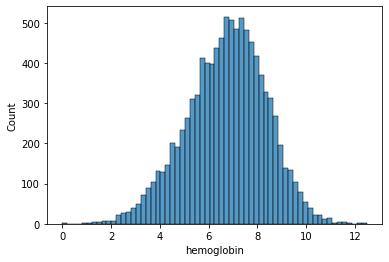

In [26]:
sns.histplot(data=dfl.hemoglobin)

Zistíme si základné vlastnosti atribútu hemoglobín, ako min hodnota, max hodnota, či priemerná hodnota:

In [27]:
dfl.hemoglobin.describe()

count    9985.000000
mean        6.735597
std         1.620583
min         0.000000
25%         5.695290
50%         6.836120
75%         7.864160
max        12.483130
Name: hemoglobin, dtype: float64

Pozrieme sa na koeficient asymetrie rozdelenia hodnôt hemoglobínu:

In [28]:
dfl.hemoglobin.skew()

-0.25039670757432236

Šikmosť je menšia ako 0 ale zároveň väčšia ako -0.5, čo znamená že rozdelenie hemoglobínu je celkom symetrické avšak trochu ťažšie na pravej strane (negatívna asymetria).

Pozrieme sa na koeficient špičatosti rozdelenia hodnôt hemoglobínu:

In [29]:
dfl.hemoglobin.kurtosis()

-0.026888343109358726

Z hodnoty špičatosti vieme, že sa pre atribút hemoglobín nachádza menej hodnôt na okrajoch a rozdelenie je ploché.

**Rozdelenie hematokritu:**

<AxesSubplot:xlabel='hematokrit', ylabel='Count'>

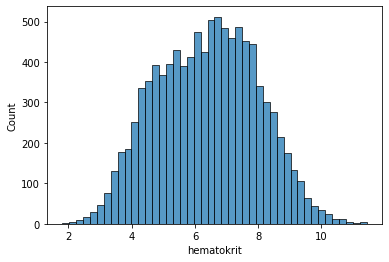

In [30]:
sns.histplot(data=dfl.hematokrit)

Zistíme si základné vlastnosti atribútu hematokrit, ako min hodnota, max hodnota, či priemerná hodnota:

In [31]:
dfl.hematokrit.describe()

count    9987.000000
mean        6.379837
std         1.593761
min         1.806100
25%         5.162530
50%         6.447480
75%         7.563310
max        11.428950
Name: hematokrit, dtype: float64

Pozrieme sa na koeficient asymetrie rozdelenia hodnôt hematokritu:

In [32]:
dfl.hemoglobin.skew()

-0.25039670757432236

Šikmosť je menšia ako 0 ale zároveň väčšia ako -0.5, čo znamená že rozdelenie hematokritu je celkom symetrické avšak trochu ťažšie na pravej strane (negatívna asymetria).

Pozrieme sa na koeficient špičatosti rozdelenia hodnôt hemoglobínu:

In [33]:
dfl.hemoglobin.kurtosis()

-0.026888343109358726

Z hodnoty špičatosti vieme, že sa pre atribút hematokrit nachádza menej hodnôt na okrajoch a rozdelenie je ploché.

**Rozdelenie erytrocytov:**

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

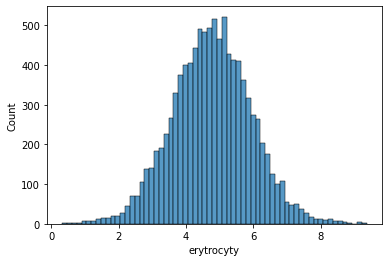

In [34]:
sns.histplot(data=dfl.erytrocyty)

Zistíme si základné vlastnosti atribútu erytrocyty, ako min hodnota, max hodnota, či priemerná hodnota:

In [35]:
dfl.erytrocyty.describe()

count    9987.000000
mean        4.769255
std         1.167590
min         0.328770
25%         3.995755
50%         4.773670
75%         5.545965
max         9.363550
Name: erytrocyty, dtype: float64

Pozrieme sa na koeficient asymetrie rozdelenia hodnôt erytrocytov:

In [36]:
dfl.erytrocyty.skew()

0.015462758377710053

Šikmosť je väčšia ako 0 ale zároveň menšia ako 0.5, čo znamená že rozdelenie hematokritu je celkom symetrické avšak trochu ťažšie na ľavej strane (negatívna asymetria).

Pozrieme sa na koeficient špičatosti rozdelenia hodnôt erytrocytov:

In [37]:
dfl.erytrocyty.kurtosis()

0.2853282235461396

Z hodnoty špičatosti vieme, že sa pre atribút erytrocyty nachádza viac hodnôt na okrajoch a rozdelenie je špičaté (nakoľko je hodnota kurtosis pozitívna).

**Rozdelenie leukocytov:**

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

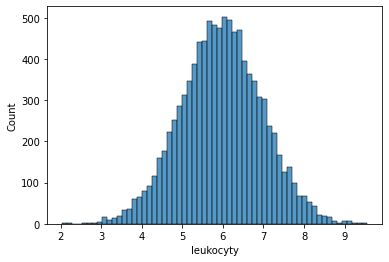

In [38]:
sns.histplot(data=dfl.leukocyty)

Zistíme si základné vlastnosti atribútu leukocyty, ako min hodnota, max hodnota, či priemerná hodnota:

In [39]:
dfl.leukocyty.describe()

count    9986.000000
mean        5.963060
std         0.997483
min         2.039120
25%         5.306335
50%         5.963415
75%         6.633057
max         9.544190
Name: leukocyty, dtype: float64

Pozrieme sa na koeficient asymetrie rozdelenia hodnôt leukocytov:

In [40]:
dfl.leukocyty.skew()

-0.010269243523144444

Šikmosť je menšia ako 0 ale zároveň väčšia ako -0.5, čo znamená že rozdelenie leukocytov je celkom symetrické avšak trochu ťažšie na pravej strane (negatívna asymetria).

Pozrieme sa na koeficient špičatosti rozdelenia hodnôt leukocytov:

In [41]:
dfl.leukocyty.kurtosis()

-0.01805868137407929

Z hodnoty špičatosti vieme, že sa pre atribút leukocyty nachádza menej hodnôt na okrajocha rozdelenie je ploché.

**Rozdelenie trombocytov:**

<AxesSubplot:xlabel='trombocyty', ylabel='Count'>

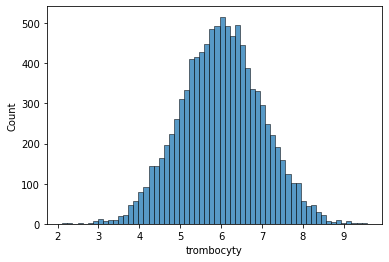

In [42]:
sns.histplot(data=dfl.trombocyty)

Zistíme si základné vlastnosti atribútu trombocyty, ako min hodnota, max hodnota, či priemerná hodnota:

In [43]:
dfl.trombocyty.describe()

count    9987.000000
mean        5.994497
std         0.993750
min         2.114710
25%         5.319635
50%         5.999860
75%         6.657495
max         9.560170
Name: trombocyty, dtype: float64

Pozrieme sa na koeficient asymetrie rozdelenia hodnôt trombocytov:

In [44]:
dfl.trombocyty.skew()

-0.0086023430585214

Šikmosť je menšia ako 0 ale zároveň väčšia ako -0.5, čo znamená že rozdelenie trombocytov je celkom symetrické avšak trochu ťažšie na pravej strane (negatívna asymetria).

Pozrieme sa na koeficient špičatosti rozdelenia hodnôt trombocytov:

In [45]:
dfl.trombocyty.kurtosis()

-0.041982113756123596

Z hodnoty špičatosti vieme, že sa pre atribút trombocyty nachádza menej hodnôt na okrajoch a rozdelenie je ploché.

## Identifikácia problémov dát zo súboru labor.csv s navrhnutým riešením

Ako prvý problém znova vidíme nepotrebný index stĺpec s názvom "Unnamed: 0", ktorý môžeme odstrániť.

In [46]:
dfl.drop('Unnamed: 0', axis=1, inplace=True)
dfl.head()

leukocyty          ssn              name smoker  hemoglobin  trombocyty  \
0    5.90289  513-95-7625     Andrew Jacobs     no     7.54279     5.83096   
1    5.56403  025-71-2115      Ian Harrison      Y     7.87747         NaN   
2    6.24057  824-63-0108  Matthew Williams     no     4.72650     7.83234   
3    5.48374  157-32-2908    Charles Chavez     no     5.43079     5.36911   
4    6.04784  545-96-1267    Allen Chung MD    yes     8.85943     6.76682   

   indicator       alt relationship     weight       ast       alp  \
0        1.0  17.60670      widowed    8.09544  42.92870  60.77098   
1        1.0  17.78037       single   73.58725  50.25507  47.14780   
2        1.0  25.25152       single  129.45079  25.15943  48.53570   
3        1.0  18.32802      divoced   18.61698  45.02094  73.77687   
4        1.0  11.03841      divoced   78.83355  59.06392  17.65112   

   hematokrit    hbver    etytr     er-cv  erytrocyty  
0     6.50802  5.54259  6.57020  47.78400     5.46395  
1     3.49169  3.52227  4.82276  55.62479     5.37924  
2     8.65913  8.25976  5.64422  48.44629     6.52365  
3     9.30190  6.26535  6.23014  50.48872     4.33766  
4     4.47835  2.28488  7.83874  38.74892     5.17704

V dátach sa nachádzajú duplicitné záznamy.

In [47]:
len(dfl) - len(dfl.drop_duplicates()) ## 99 duplicitnych zaznamov

99

In [48]:
dfl = dfl.drop_duplicates() ## odstranene duplicitne zaznamy
len(dfl)

9918

Identifikovali sme problém s dátami vo forme zlých hodnôt (prípadne rozdelenia hodnôt) hmotnosti. Možným riešením by bolo odstránenie záznamov s hmotnosťou <= 0, keďže takýchto záznamov je z celkového počtu približne 2,3%.

In [49]:
len(dfl[dfl.weight <= 0]) / len(dfl) * 100

2.3089332526719097

<AxesSubplot:xlabel='weight', ylabel='Count'>

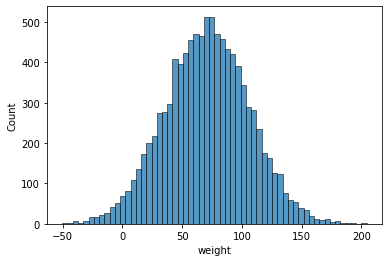

In [50]:
sns.histplot(data=dfl['weight'])

Takisto sa v dátach vyskytujú chýbajúce hodnoty. Vzhľadom na ich relatívne nízku početnosť v porovnaní s celkovým počtom záznamov by možným riešením bolo nahradenie chýbajúcich hodnôt priemernými hodnotami daného atribútu (berúc do úvahy zistenie, že chýbajúce hodnoty sa vyskytujú len a práve pri číselných atribútoch, ktoré sú výsledkom samotného vyšetrenia/merania).

In [51]:
dfl.isnull().sum()

leukocyty       30
ssn              0
name             0
smoker           0
hemoglobin      30
trombocyty      30
indicator        0
alt             30
relationship     0
weight           0
ast             30
alp             30
hematokrit      30
hbver           30
etytr           30
er-cv           30
erytrocyty      30
dtype: int64

In [52]:
len(dfl[dfl.isnull().any(axis=1)])

324

Ďalším problémom je nekonzistentné vyplnenie stĺpca smoker. Tento problém už teraz vieme jednoducho opraviť.

In [53]:
dfl.smoker.unique()

array(['no', 'Y', 'yes', 'N'], dtype=object)

In [54]:
dfl['smoker'] = dfl['smoker'].str.replace('N','no')
dfl['smoker'] = dfl['smoker'].str.replace('Y','yes')
dfl.smoker.unique()

array(['no', 'yes'], dtype=object)

## Párová analýza dát

**Fajčiari vs. nefajčiari**

Ako prvé sa pozrieme na celkový podiel fajčiarov a nefajčiarov.

<AxesSubplot:xlabel='smoker', ylabel='Count'>

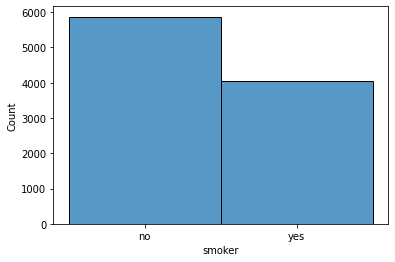

In [55]:
sns.histplot(data=dfl['smoker'])

In [56]:
len(dfl[dfl['smoker'] == 'no']) / len(dfl) * 100

59.20548497680984

Z grafu je nám jasné, že v datasete sa nachádza väčší počet nefajčiarov ako fajčiarov. Nefajčiari tvoria zaokrúhlene 59.2% z celkového počtu záznamov.

**Krvné skupiny a pohlavia**

Ako ďalšie sa pozrieme na rozdelenie krvných skupín a ich zastúpenie medzi mužmi a ženami. Tieto dáta sa nachádzajú v prvej tabuľke profiles.

In [57]:
dfp.groupby(['blood_group', 'sex']).size()

blood_group  sex
A+           F      200
             M      206
A-           F      186
             M      186
AB+          F      209
             M      184
AB-          F      175
             M      206
B+           F      203
             M      176
B-           F      188
             M      173
O+           F      204
             M      208
O-           F      198
             M      180
dtype: int64

Vo viacerých krvných skupinách môžeme pozorovať približne rovnaké zastúpenie mužov a žien (napr. A+, A-, B-, 0+).

**Závislosti medzi číselnými atribútmi tabuľky labor**

Pre zistenie závislostí medzi dvojicami číselných atribútov si najskôr vykreslíme heatmapu a pairplot všetkých z nich.

<AxesSubplot:>

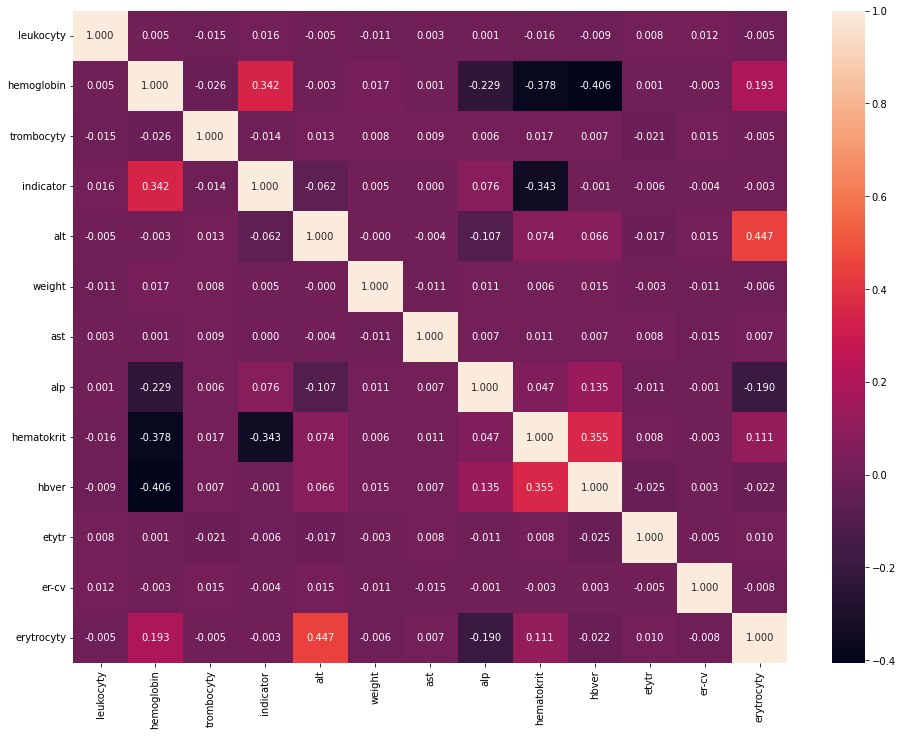

In [58]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(dfl.corr(), ax=ax, annot=True, fmt=".3f")

Z výsledkov heatmapy vidíme, že väčšina atribútov má medzi sebou koreláciu s hodnotou blížiacou s k 0, čo znamená, že medzi ich hodnotami nie je skoro žiadny vzťah a teda nie sú od seba skoro vôbec závislé.
Pozitívna korelácia, kedy sa hodnota korelácie približuje alebo rovná 1 a teda hodnoty oboch atribútov sa pohybujú rovnakým smerom je výraznejšia napríklad medzi atribútmi **indikátor + hemoglobín**, **alt + erytrocyty** alebo **hematokrit + hbver**.
Negatívna korelácia, kedy sa hodnota korelácie približuje alebo rovná -1 a teda hodnoty oboch atribútov sa pohybujú opačným smerom je výraznejšia napríklad medzi atribútmi **hemoglobín + alp**, **hemoglobín + hematokrit**, **hemoglobín + hbver** alebo **indikátor + hematokrit**.

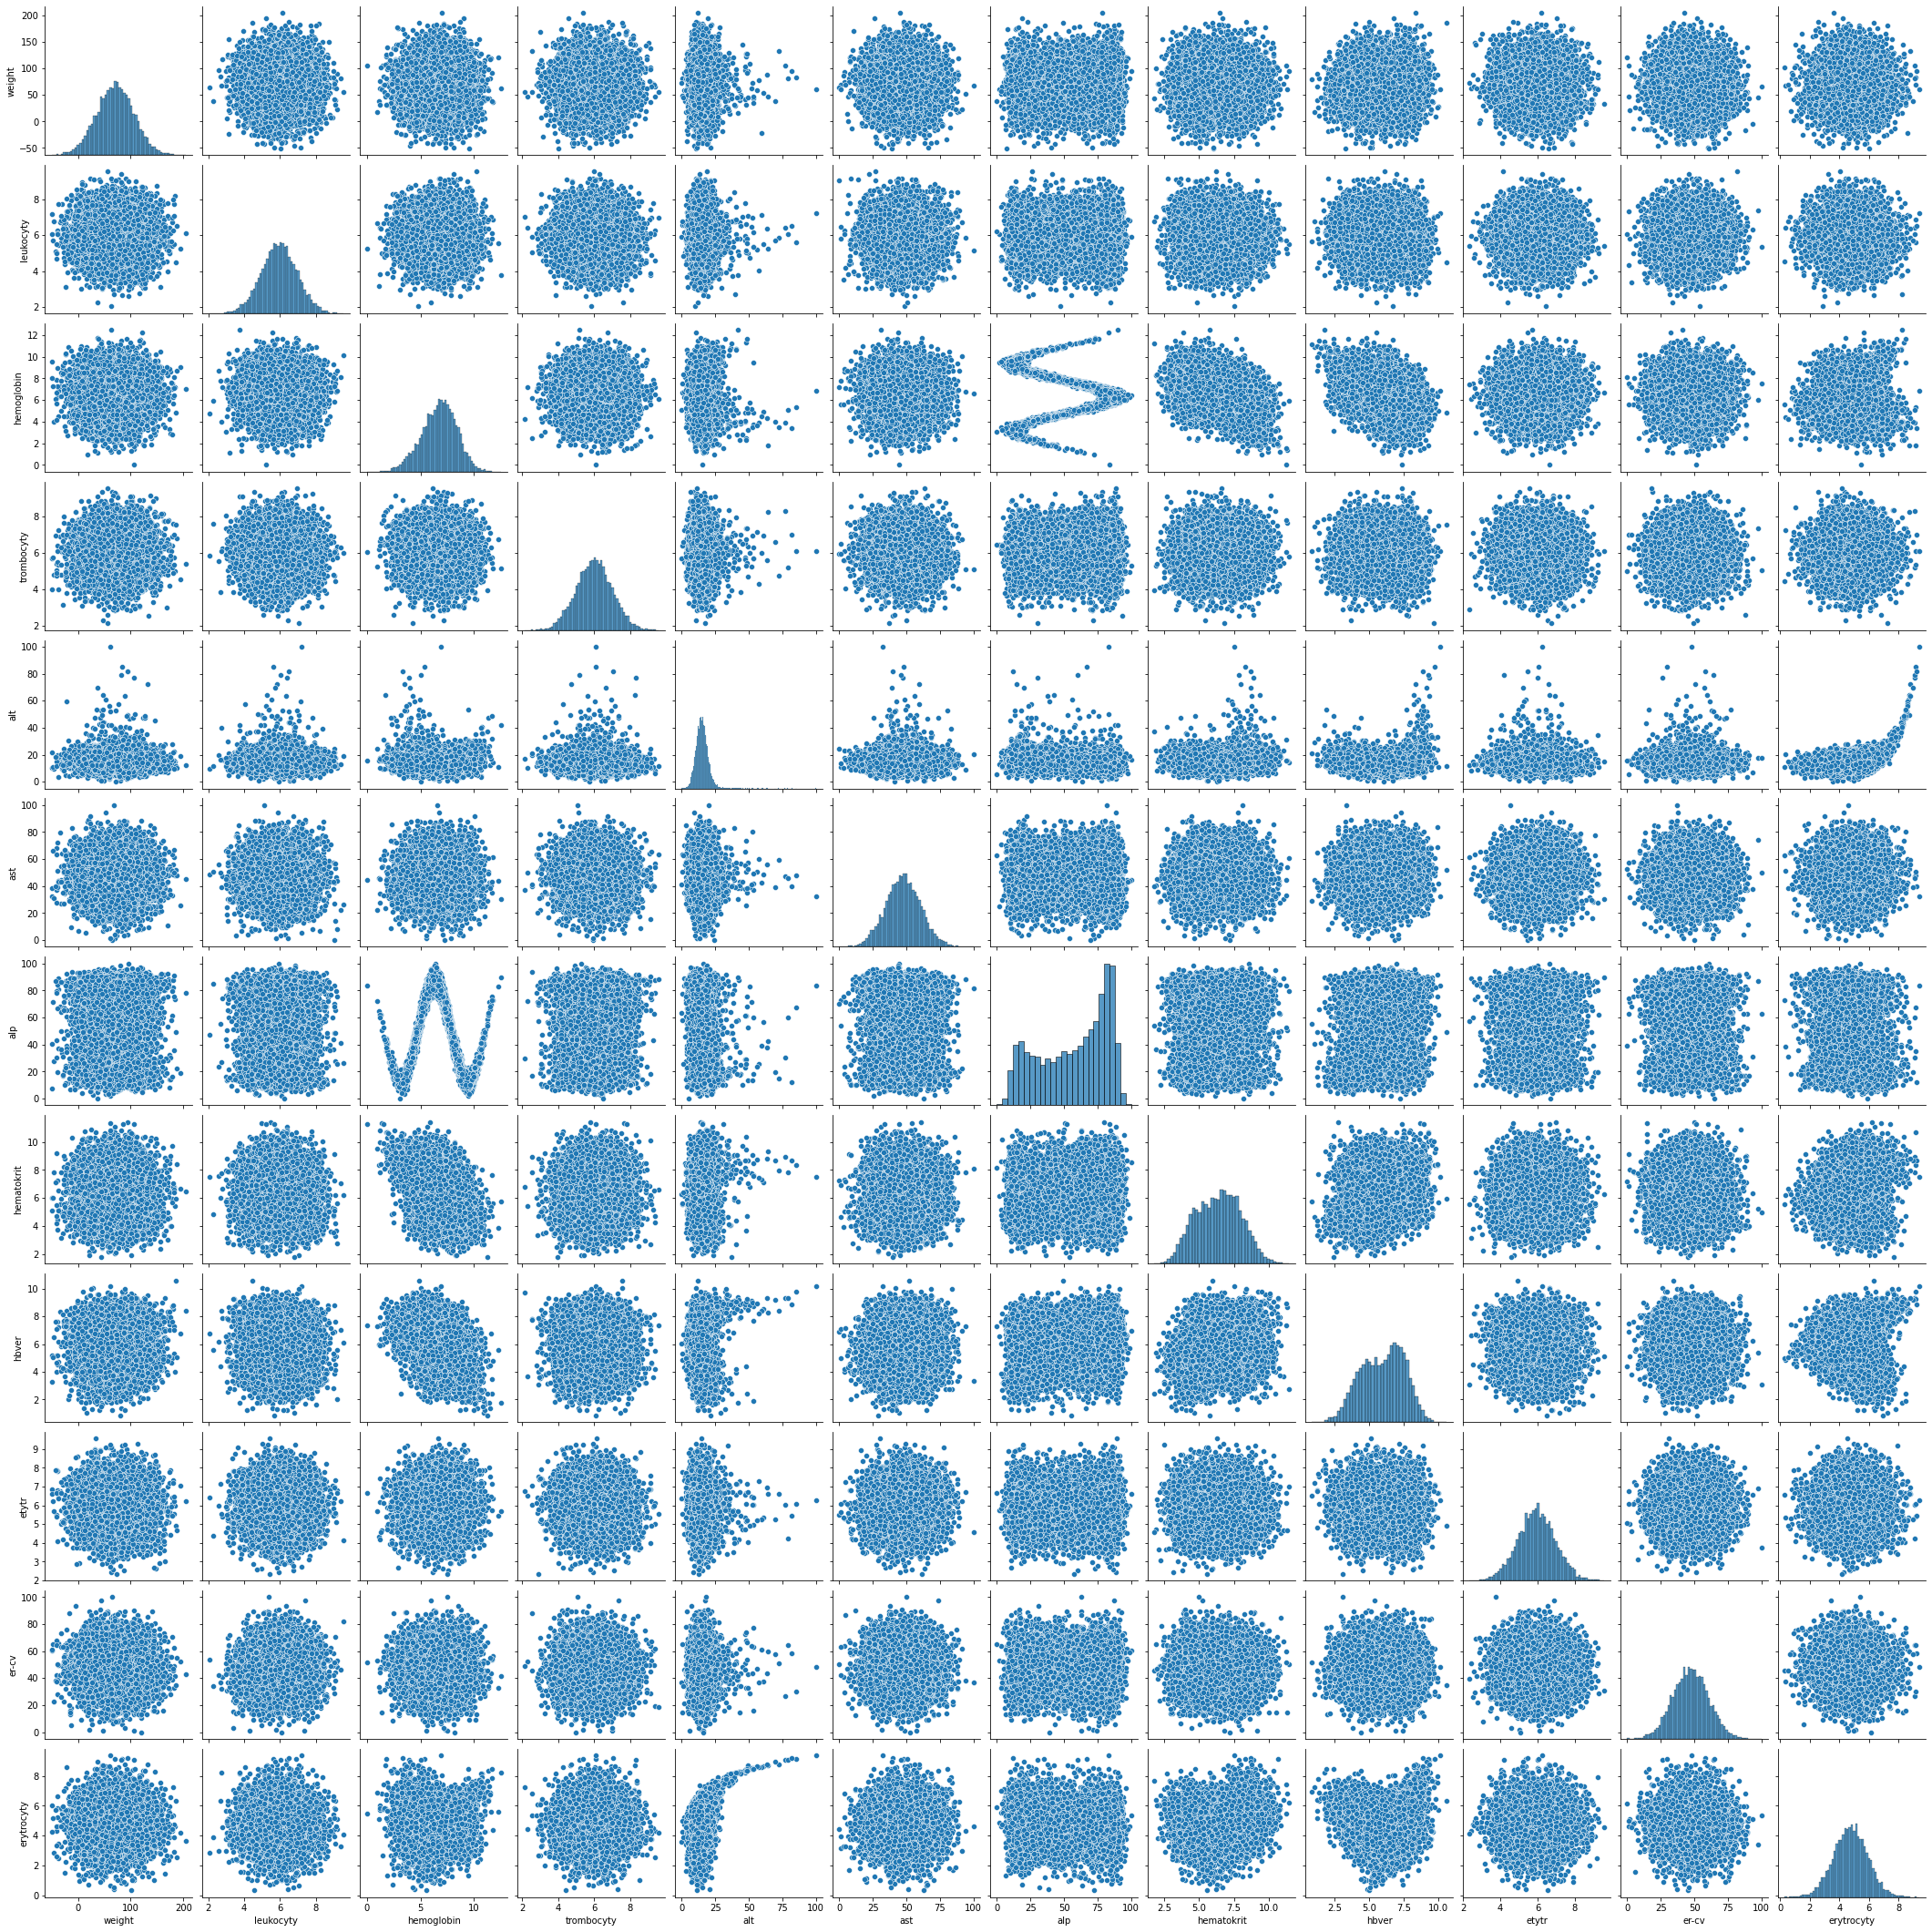

In [59]:
sns.pairplot(dfl[['weight', 'leukocyty', 'hemoglobin', 'trombocyty', 'alt', 'ast', 'alp', 'hematokrit', 'hbver', 'etytr', 
     'er-cv', 'erytrocyty']])

Väčšina z dvojíc atribútov medzi sebou má veľmi nízku, takmer žiadnu závislosť a ich grafy vyzerajú podobne ako tento príklad:

**Hemoglobín a trombocyty**

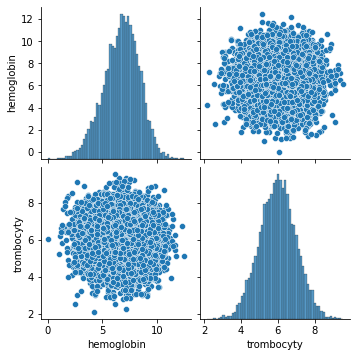

In [60]:
sns.pairplot(dfl[['hemoglobin', 'trombocyty']])

<AxesSubplot:xlabel='hemoglobin', ylabel='trombocyty'>

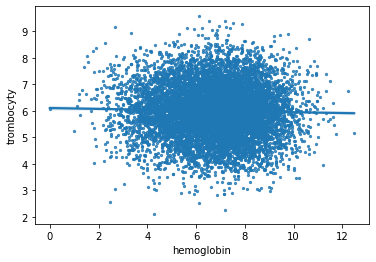

In [61]:
sns.regplot(data=dfl, x="hemoglobin", y="trombocyty", scatter_kws={'s':5})

Atribúty hemoglobín a trombocyty medzi sebou nemajú žiadnu koreláciu.

**Hemoglobín a alp**

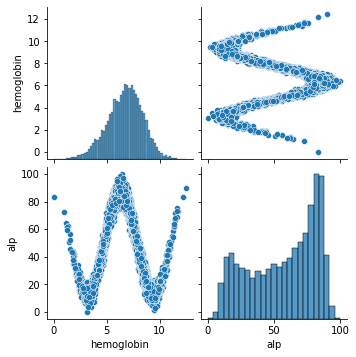

In [62]:
sns.pairplot(dfl[['hemoglobin', 'alp']])

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

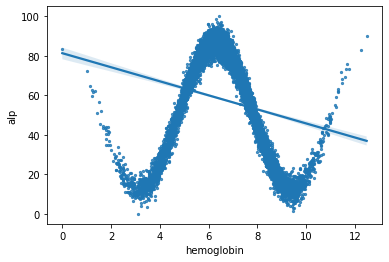

In [63]:
sns.regplot(data=dfl, x="hemoglobin", y="alp", scatter_kws={'s':5})

Atribúty hemoglobín a alp majú medzi sebou malú negatívnu koreláciu, čo znamená že so zvyšujúcou sa hodnotou jedného atribútu sa znižuje hodnota druhého atribútu a opačne.

**Erytrocyty a alt**

Dvojica, ktorá sa podľa grafu vizuálne najviac približuje nejakej forme závislosti, je *alt* (alanín transmináza) a *erytrocyty*. S vyššou hodnotou erytrocytov sa zvyšuje aj hodnota alt. Krivka však nemá príliš blízko k tvaru priamky y=x, pripomína skôr exponenciálnu funkciu (resp. logaritmickú, podľa zvolenia osí).

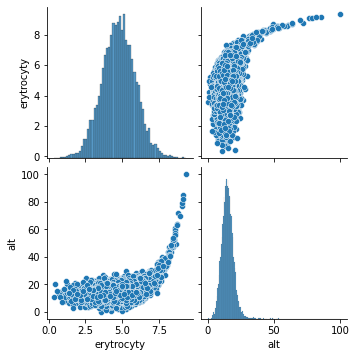

In [64]:
sns.pairplot(dfl[['erytrocyty', 'alt']])

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

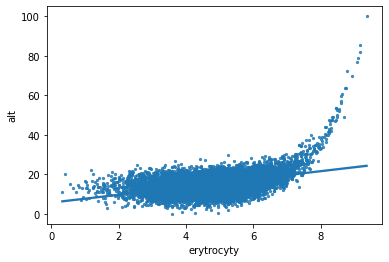

In [65]:
sns.regplot(data=dfl, x="erytrocyty", y="alt", scatter_kws={'s':5})

Atribúty erytrocyty a alt majú medzi sebou tzv. "curvilinear relationship", čo znamená, že medzi hodnotami ktoré nadobúdajú je určitá miera korelácie (v tomto prípade pozitívnej), avšak ich korelácia nie je lineárna.

**Závislosti jednotlivých atribútov od predikovanej premennej**

Predikovaná premenná (indikátor) nám dáta rozdeľuje na dve skupiny (hodota indikátora 0 a 1). Pomocou grafov si môžeme vykresľovať distribúcie jednotlibých premenných rozdelené podľa indikátora a následne tieto dve skupiny porovnávať. Pri väčšine atribútov sme nepozorovali takmer žiaden rozdiel v závislosti od hodnoty indikátora, ako vidíme na nasledujúcom príklade atribútov **Indikátor a ast**:

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'ast')]

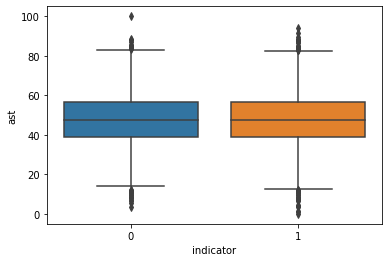

In [66]:
sns.boxplot(data=[dfl[dfl['indicator'] == 0]['ast'], dfl[dfl['indicator'] == 1]['ast']]).set(xlabel='indicator', ylabel='ast')

Tri atribúty v heat mape vizuálne preukázali nejakú formu korelácie vzhľadom na indikátor: *hemoglobín*, *alp (alkalická fosfatáza)* a *hematokrit*. Aby bola závislosť lepšie viditeľáý, vykreslili sme ju okrem box-plotu aj cez joint-plot a kde-plot.

**Indikátor a hemoglobín**

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'hemoglobin')]

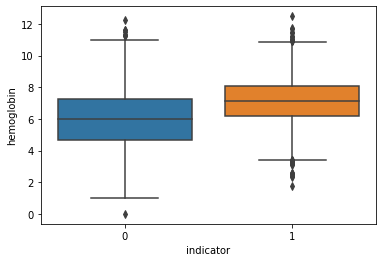

In [67]:
sns.boxplot(data=[dfl[dfl['indicator'] == 0]['hemoglobin'], dfl[dfl['indicator'] == 1]['hemoglobin']]).set(xlabel='indicator', ylabel='hemoglobin')

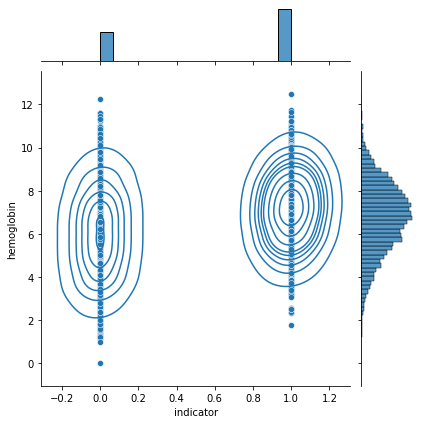

In [68]:
sns.jointplot(x='indicator', y='hemoglobin', data=dfl).plot_joint(sns.kdeplot, n_levels=10)

Z grafu môžeme pozorovať hustejší výskyt vyšších hodnôt hemoglobínu pri indikátore s hodnotou 1. Hodnoty hemoglobínu sú výrazne nižšie v prípade indikátora s hodnotou 0. 

**Indikátor a alp**

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'alp')]

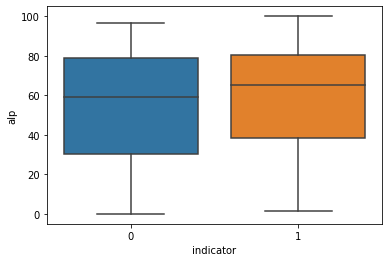

In [69]:
sns.boxplot(data=[dfl[dfl['indicator'] == 0]['alp'], dfl[dfl['indicator'] == 1]['alp']]).set(xlabel='indicator', ylabel='alp')

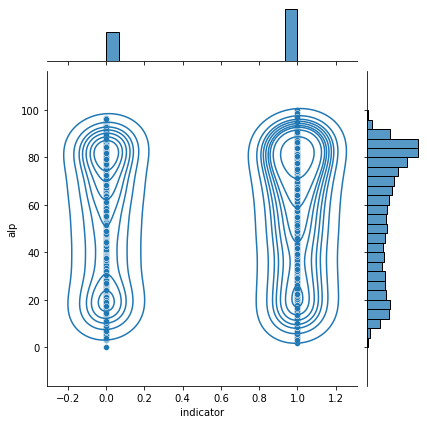

In [70]:
sns.jointplot(x='indicator', y='alp', data=dfl).plot_joint(sns.kdeplot, n_levels=10)

Z grafov môžeme pozorovať výrazne hustejší výskyt vysokých hodnôt alp pri indikátore s hodnotou 1. Pri indikátore 0 je v prvom grafe vidno výskyt nižších hodnôt alp.

**Indikátor a hematokrit**

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'hematokrit')]

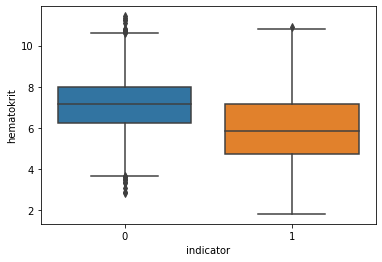

In [71]:
sns.boxplot(data=[dfl[dfl['indicator'] == 0]['hematokrit'], dfl[dfl['indicator'] == 1]['hematokrit']]).set(xlabel='indicator', ylabel='hematokrit')

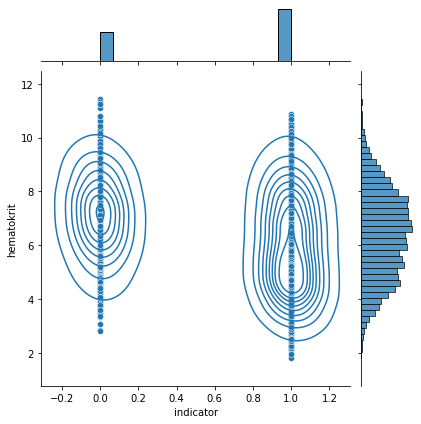

In [72]:
sns.jointplot(x='indicator', y='hematokrit', data=dfl).plot_joint(sns.kdeplot, n_levels=10)

Z grafu môžeme pozorovať výrazne väčší počet nízkych hodnôt hematokritu ak je hodnota indikátora rovná 1. Pri indikátore s hodnotou 0 je väčší výskyt vyšších hodnôt hematokritu.

## Formulácia a štatistické overenie hypotéz o dátach

**Prvá hypotéza**

**Chceme overiť, či má hladina hemoglobínu vplyv na indikátor.**

Určíme si naše hypotézy nasledovne:

**$H_0$ (nulová hypotéza)**: Hladina hemoglobínu pacientov s indikátorom 0 **je** v priemere **rovnaká** ako hladina hemoglobínu pacientov s indikátorom 1.

**$H_1 = H_A$ (alternatívna hypotéza)**: Hladina hemoglobínu pacientov s indikátorom 0 **je** v priemere **iná/väčšia/menšia** ako hladina hemoglobínu pacientov s indikátorom 1.

Rozdelíme si hladiny hemoglobínu na dve skupiny podľa indikátora (odstránime NaN, ktorých bolo dokopy len 30).

In [73]:
hemo_0 = dfl[dfl['indicator'] == 0]['hemoglobin'].dropna()
hemo_1 = dfl[dfl['indicator'] == 1]['hemoglobin'].dropna()

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'hemoglobin')]

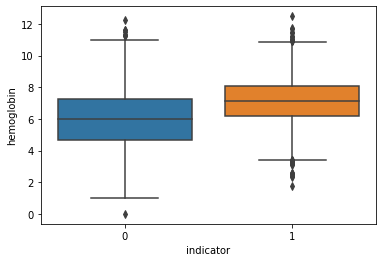

In [74]:
sns.boxplot(data=[hemo_0, hemo_1]).set(xlabel='indicator', ylabel='hemoglobin')

<AxesSubplot:ylabel='Density'>

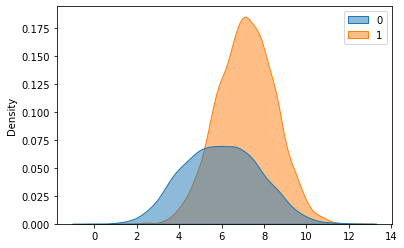

In [75]:
d = {'0': hemo_0, '1': hemo_1}
df = pd.DataFrame(data=d)
sns.kdeplot(data=df, fill = True, alpha = 0.5)

Z prvotných grafov sa vizuálne zdá, že rozdiel existuje. Musíme však zistiť, či je štatisticky signifikantný. Na to sa často používa **Studentov t-test**, pre ktorý ale musia skupiny dát spĺňať určité podmienky. Prvou je, že obe skupiny musia pochádzať z normálneho rozdelenia.

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

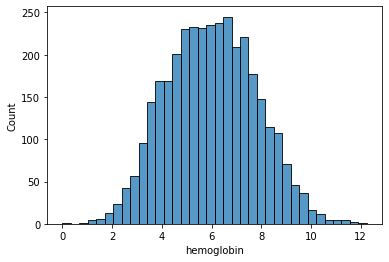

In [76]:
sns.histplot(data=hemo_0)

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

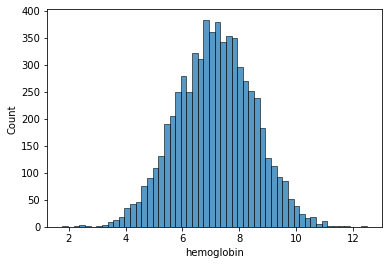

In [77]:
sns.histplot(data=hemo_1)

Prvotne sa môže zdať, že obe supiny majú normálne rozdelenie. Tento predpoklad si však musíme lepšie overiť.

In [78]:
##funkcia na detekciu outlierov
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [79]:
hemo_0_out = identify_outliers(hemo_0)
hemo_1_out = identify_outliers(hemo_1)
print(len(hemo_0_out))
print(len(hemo_1_out))

9
35


Obe skupiny obsahujú outlierov, preto ich odstránime:

In [80]:
hemo_0 = hemo_0.drop(hemo_0_out.index)
hemo_1 = hemo_1.drop(hemo_1_out.index)

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


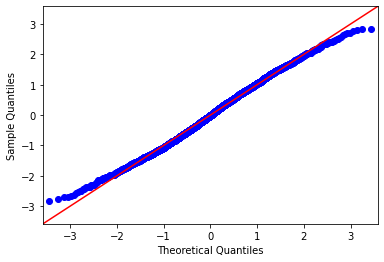

In [81]:
_ = sm.ProbPlot(hemo_0, fit=True).qqplot(line='45')

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


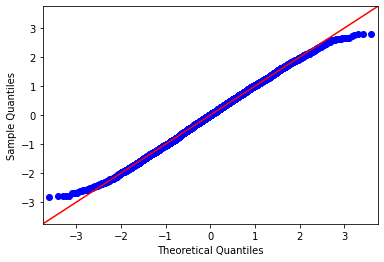

In [82]:
_ = sm.ProbPlot(hemo_1, fit=True).qqplot(line='45')

Z QQ-plotu sa javí, že skupiny nepochádzajú z normálneho rozdelenia, ale ich rozdelenia sa na seba podobajú. 

In [83]:
stats.kurtosis(hemo_0)

-0.4852596592842815

In [84]:
stats.kurtosis(hemo_1)

-0.3138142815914269

In [85]:
stats.skew(hemo_0)

0.049008205858826454

In [86]:
stats.skew(hemo_1)

-0.030752183231020084

Rozdelenia našich skupín majú podobné vlastnosti špičatosti (kurtosis), avšak mierne sa líšia v asymetrii, nakoľko skupina s indikátorom 0 je viac ťažká na ľavej strane a skupina s indikátorom 1 na pravej strane.

Či naozaj nepochádzajú z normálneho rozdelenia môžeme overiť **Shapiro-Wilkovým testom**.

In [87]:
stats.shapiro(hemo_0)

ShapiroResult(statistic=0.9959529042243958, pvalue=3.599223319383782e-08)

In [88]:
stats.shapiro(hemo_1)

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.998154878616333, pvalue=7.563602366644773e-07)

Testovali sme nulovú hypotézu $H_0$, že dáta pochádzajú z normálneho rozdelenia. Ak je $p < 0,05$, nulovú hypotézu $H_0$ zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je $p > 0,05$, nulovú hypotézu $H_0$ nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

Pre rozdelenia oboch skupín nám vyšla hodnota $p < 0,05$, nulovú hypotézu teda $H_0$ zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Mali by sme teda použiť neparametrickú verziu t-testu, t. j. **Mann-Whitneyho U-test**

**Studentov t-test** vyžaduje tiež, aby rozdelenia oboch skupín mali podobnú varianciu. Môžme si ukázať tiež **Levenov test**, ktorý na overenie tejto podmienky slúži, aj keď už z predošlých testov je jasné, že Studentov t-test nemôžeme použiť. Levenov test testuje nulovú hypotézu $H_0$, že všetky vstupné vzorky pochádzajú z rozdelení s rovnakými varianciami. Ak $H_0$ nezamietame ($p > 0,05$), znamená to, že na základe dát nemôžeme prehlásiť, že by vzorky pochádzali z distribúcií s rôznymi varianciami.

In [89]:
stats.levene(hemo_0, hemo_1)

LeveneResult(statistic=438.1176485022613, pvalue=3.237783967301522e-95)

p-value je blížiaci sa k nule, to znamená, že rozdelenia našich skupín nemajú ani podobné variancie.

Nebol teda splnený ani jeden z predpokladov na použitie t-testu, preto spustíme **Mann-Whitneyho U-test**.

In [90]:
stats.mannwhitneyu(hemo_0, hemo_1)

MannwhitneyuResult(statistic=6737046.0, pvalue=6.312924688938223e-230)

Keďže $p < 0,001$, pravdepodobnosť chyby 1. rádu (že $H_0$ je pravdivá a my ju zamietame) je menej ako 1 promile. Našu nulovú hypotézu $H_0$ teda zamietame v prospech alternatívnej hypotézy $H_A$. Rozdiel v priemernej hladine hemoglobínu medzi pacientami s indikátorom 0 a indikátorom 1 je štatisticky signifikantný.

Môžeme si vizualizovať rozdiel medzi dvoma priemermi spolu s intervalmi spoľahlivosti, ktoré nám hovoria, že s N% pravdepodobnosťou (najčastejšie sa používa 95) sa skutočná hodnota priemeru bude nachádzať niekde v danom intervale.

In [91]:
sms.DescrStatsW(hemo_0).tconfint_mean()

(5.921212637445691, 6.038326141093122)

In [92]:
sms.DescrStatsW(hemo_1).tconfint_mean()

(7.11533480518697, 7.1805706900811686)

<AxesSubplot:xlabel='indicator', ylabel='hemoglobin'>

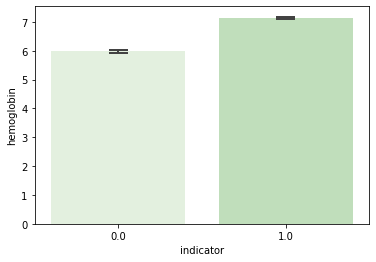

In [93]:
sns.barplot(x='indicator', y='hemoglobin', data=dfl[(dfl.indicator == 0) | (dfl.indicator == 1)].dropna(), 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Greens"))

**Záver:** hypotézu $H_0$, že priemerná hladina hemoglobínu u pacientov s indikátorom 0 a pacientov s indikátorom 1 je rovnaká, sme zamietli v prospech alternatívnej hypotézy $H_A$. Priemerná hladina hemoglobínu u pacientov s indikátorom 0 je nižšia ako u pacientov s indikátorom 1 a tento rozdiel je štatisticky signifikantný.

**Druhá hypotéza**

**Chceme overiť, či má hodnota hematokritu vplyv na indikátor.**

Určíme si naše hypotézy nasledovne:

**$H_0$ (nulová hypotéza)**: Hodnota hematokritu pacientov s indikátorom 0 **je** v priemere **rovnaká** ako hodnota hematokritu pacientov s indikátorom 1.

**$H_1 = H_A$ (alternatívna hypotéza)**: Hodnota hematokritu pacientov s indikátorom 0 **je** v priemere **iná/väčšia/menšia** ako hodnota hematokritu pacientov s indikátorom 1.

Rozdelíme si hodnoty hematokritu na dve skupiny podľa indikátora (odstránime NaN, ktorých bolo dokopy len 30).

In [94]:
hema_0 = dfl[dfl['indicator'] == 0]['hematokrit'].dropna()
hema_1 = dfl[dfl['indicator'] == 1]['hematokrit'].dropna()

[Text(0.5, 0, 'indicator'), Text(0, 0.5, 'hematokrit')]

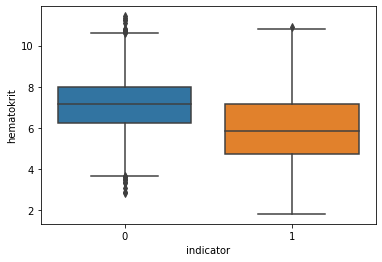

In [95]:
sns.boxplot(data=[hema_0, hema_1]).set(xlabel='indicator', ylabel='hematokrit')

Z prvotného grafu sa vizuálne zdá, že rozdiel existuje. Musíme však zistiť, či je štatisticky signifikantný. Na to sa často používa **Studentov t-test**, pre ktorý ale musia skupiny dát spĺňať určité podmienky. Prvou je, že obe skupiny musia pochádzať z normálneho rozdelenia.

<AxesSubplot:xlabel='hematokrit', ylabel='Count'>

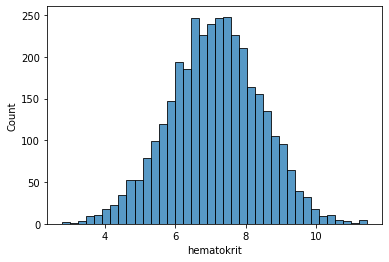

In [96]:
sns.histplot(data=hema_0)

<AxesSubplot:xlabel='hematokrit', ylabel='Count'>

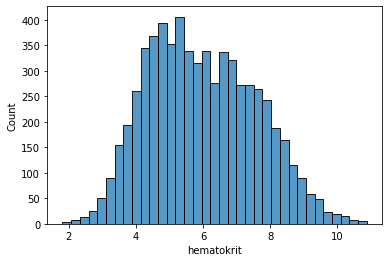

In [97]:
sns.histplot(data=hema_1)

Prvotne sa môže zdať, že skupina s indikátorom 0 má normálne rozdelenie a skupina s indikátorom 1 nie je z normálneho rozdelenia. Tento predpoklad si však musíme lepšie overiť.

In [98]:
hema_0_out = identify_outliers(hema_0)
hema_1_out = identify_outliers(hema_1)
print(len(hema_0_out))
print(len(hema_1_out))

22
1


Obe skupiny obsahujú outlierov, preto ich odstránime:

In [99]:
hema_0 = hema_0.drop(hema_0_out.index)
hema_1 = hema_1.drop(hema_1_out.index)

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


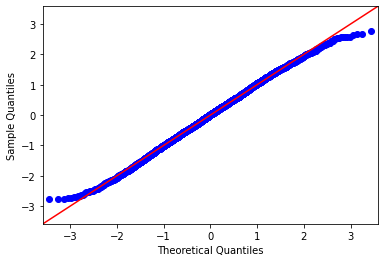

In [100]:
_ = sm.ProbPlot(hema_0, fit=True).qqplot(line='45')

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


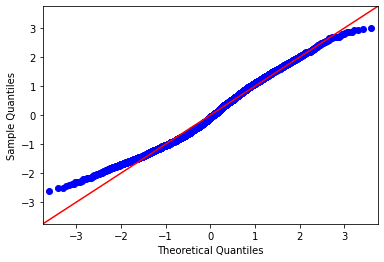

In [101]:
_ = sm.ProbPlot(hema_1, fit=True).qqplot(line='45')

Z QQ-plotu sa javí, že skupiny nepochádzajú z normálneho rozdelenia, a aj ich rozdelenia sa od seba mierne líšia. 

In [102]:
stats.kurtosis(hema_0)

-0.28235530662169195

In [103]:
stats.kurtosis(hema_1)

-0.6021828788323154

In [104]:
stats.skew(hema_0)

-0.06495368345547202

In [105]:
stats.skew(hema_1)

0.24961028345168101

Rozdelenia našich skupín majú podobné vlastnosti špičatosti (kurtosis), ale odlišné vlastnosti asymetrie (skew). Skupina s indikátorom 1 má rozdelenie s výraznejším zošikmením smerom doľava.

Či naozaj nepochádzajú z normálneho rozdelenia môžeme overiť **Shapiro-Wilkovým testom**.

In [106]:
stats.shapiro(hema_0)

ShapiroResult(statistic=0.9979398846626282, pvalue=0.00014385193935595453)

In [107]:
stats.shapiro(hema_1)

C:\Users\misul\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9866166114807129, pvalue=4.154766699161236e-24)

Testovali sme nulovú hypotézu $H_0$, že dáta pochádzajú z normálneho rozdelenia. Ak je $p < 0,05$, nulovú hypotézu $H_0$ zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je $p > 0,05$, nulovú hypotézu $H_0$ nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

Pre rozdelenia oboch skupín nám vyšla hodnota $p < 0,05$, nulovú hypotézu teda $H_0$ zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Mali by sme teda použiť neparametrickú verziu t-testu, t. j. **Mann-Whitneyho U-test**

**Studentov t-test** vyžaduje tiež, aby rozdelenia oboch skupín mali podobnú varianciu. Môžme si ukázať tiež **Levenov test**, ktorý na overenie tejto podmienky slúži, aj keď už z predošlých testov je jasné, že Studentov t-test nemôžeme použiť. Levenov test testuje nulovú hypotézu $H_0$, že všetky vstupné vzorky pochádzajú z rozdelení s rovnakými varianciami. Ak $H_0$ nezamietame ($p > 0,05$), znamená to, že na základe dát nemôžeme prehlásiť, že by vzorky pochádzali z distribúcií s rôznymi varianciami.

In [108]:
stats.levene(hema_0, hema_1)

LeveneResult(statistic=329.5792052245033, pvalue=1.7836576653218764e-72)

p-value je blížiaci sa k nule, to znamená, že rozdelenia našich skupín nemajú ani podobné variancie.

Nebol teda splnený ani jeden z predpokladov na použitie t-testu, preto spustíme **Mann-Whitneyho U-test**.

In [109]:
stats.mannwhitneyu(hema_0, hema_1)

MannwhitneyuResult(statistic=15799037.5, pvalue=2.1815414409207245e-261)

Keďže $p < 0,001$, pravdepodobnosť chyby 1. rádu (že $H_0$ je pravdivá a my ju zamietame) je menej ako 1 promile. Našu nulovú hypotézu $H_0$ teda zamietame v prospech alternatívnej hypotézy $H_A$. Rozdiel v priemernej hodnote hematokritu medzi pacientami s indikátorom 0 a indikátorom 1 je štatisticky signifikantný.

Môžeme si vizualizovať rozdiel medzi dvoma priemermi spolu s intervalmi spoľahlivosti, ktoré nám hovoria, že s N% pravdepodobnosťou (najčastejšie sa používa 95) sa skutočná hodnota priemeru bude nachádzať niekde v danom intervale.

In [110]:
sms.DescrStatsW(hema_0).tconfint_mean()

(7.072315102928971, 7.155624879888896)

In [111]:
sms.DescrStatsW(hema_1).tconfint_mean()

(5.934521163963179, 6.01310805304608)

<AxesSubplot:xlabel='indicator', ylabel='hematokrit'>

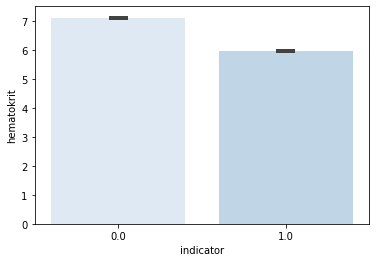

In [112]:
sns.barplot(x='indicator', y='hematokrit', data=dfl[(dfl.indicator == 0) | (dfl.indicator == 1)].dropna(), 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

**Záver:** hypotézu $H_0$, že priemerná hodnota hematokritu u pacientov s indikátorom 0 a pacientov s indikátorom 1 je rovnaká, sme zamietli v prospech alternatívnej hypotézy $H_A$. Priemerná hodnota hematokritu u pacientov s indikátorom 0 je vyššia ako u pacientov s indikátorom 1 a tento rozdiel je štatisticky signifikantný.